# New Restaurant in Bengaluru, India

In [66]:
import pandas
import numpy
from bs4 import BeautifulSoup
import requests

## Retrieving all neighbourhoods of Bengaluru from 8 tables in Wikipedia page

In [2]:
url1 = 'https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Bangalore'

In [6]:
df1 = pandas.read_html(url1)[0]
df2 = pandas.read_html(url1)[1]
df3 = pandas.read_html(url1)[2]
df4 = pandas.read_html(url1)[3]
df5 = pandas.read_html(url1)[4]
df6 = pandas.read_html(url1)[5]
df7 = pandas.read_html(url1)[6]
df8 = pandas.read_html(url1)[7]

,Name,Image,Summary
0,Basaveshwaranagar,NaN,Basaveshwaranagar is a residential locality lo...
1,Kamakshipalya,NaN,Kamakshipalya is a neighbourhood which lies ar...
2,Kengeri,NaN,Kengeri is a locality along the Mysore Road an...
3,Mahalakshmi Layout,NaN,Mahalakshmi Layout is a large neighbourhood on...
4,Nagarbhavi,NaN,Located to the south of Magadi Road and along ...
5,Nandini Layout,NaN,NaN
6,Nayandahalli,NaN,Nayandahalli is a transport junction in the we...
7,Rajajinagar,NaN,NaN
8,Rajarajeshwari Nagar,NaN,Located in the south-western part of the city ...
9,Vijayanagar,NaN,"Named after the Vijayanagara Empire, Vijayanag..."


In [54]:
df_final = pandas.concat([df1,df2,df3,df4,df5,df6,df7,df8],ignore_index=True)
df_final.head(5)

,Name,Image,Summary
0,Cantonment area,NaN,The Cantonment area in Bangalore was used as a...
1,Domlur,NaN,"Formerly part of the Cantonment area, Domlur h..."
2,Indiranagar,NaN,Indiranagar is a sought-after residential and ...
3,Jeevanbheemanagar,NaN,NaN
4,Malleswaram,NaN,NaN


In [ ]:
url_1 = 'https://en.wikipedia.org/wiki/'+df_final['Name'][1]
resp_1 = requests.get(url_1)
soup_1 = BeautifulSoup(resp_1.text, "html5lib")
lineups_1 = soup_1.find('span', {'class': 'geo-dec'})
if lineups_1 == None:
    print('Not found')
else:
    loc_str1 = lineups_1.get_text(strip=True)
    loc_split1 = loc_str1.split(" ")
    lat1 = float(loc_split1[0][0:len(loc_split1[0])-2])
    lon1 = float(loc_split1[1][0:len(loc_split1[1])-2])

In [55]:
df_final['Latitude'] = None
df_final['Longitude'] = None
for i in range(len(df_final)):
    url_x = 'https://en.wikipedia.org/wiki/'+df_final['Name'][i]
    resp_x = requests.get(url_x)
    soup_x = BeautifulSoup(resp_x.text, "html5lib")
    location_x = soup_x.find('span', {'class': 'geo-dec'})
    if location_x == None:
        df_final['Latitude'][i] = None
        df_final['Longitude'][i] = None
    else:
        loc_str = location_x.get_text(strip=True)
        loc_split = loc_str.split(" ")
        lat_x = float(loc_split[0][0:len(loc_split[0])-2])
        lon_x = float(loc_split[1][0:len(loc_split[1])-2])
        df_final['Latitude'][i] = lat_x
        df_final['Longitude'][i] = lon_x

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instanc

,Name,Image,Summary,Latitude,Longitude
0,Cantonment area,NaN,The Cantonment area in Bangalore was used as a...,None,None
1,Domlur,NaN,"Formerly part of the Cantonment area, Domlur h...",12.9608,77.6361
2,Indiranagar,NaN,Indiranagar is a sought-after residential and ...,12.9699,77.6499
3,Jeevanbheemanagar,NaN,NaN,12.966,77.6577
4,Malleswaram,NaN,NaN,13.0031,77.5643


In [97]:
# Cantonment Area
df_final.loc[0,'Latitude'] = 12.9938
df_final.loc[0,'Longitude'] = 77.5978
# Pete area
df_final.loc[5,'Latitude'] = 12.9627
df_final.loc[5,'Longitude'] = 77.5758
# Shivajinagar
df_final.loc[8,'Latitude'] = 12.99
df_final.loc[8,'Longitude'] = 77.60
# Vasanth Nagar
df_final.loc[10,'Latitude'] = 12.9920
df_final.loc[10,'Longitude'] = 77.5943
# Whitefield
df_final.loc[18,'Latitude'] = 12.97
df_final.loc[18,'Longitude'] = 77.75
# HBR Layout
df_final.loc[20,'Latitude'] = 13.0191
df_final.loc[20,'Longitude'] = 77.6465
# Horamavu
df_final.loc[21,'Latitude'] = 13.0326
df_final.loc[21,'Longitude'] = 77.6583
# Kalyan Nagar
df_final.loc[22,'Latitude'] = 13.0240
df_final.loc[22,'Longitude'] = 77.6433
# Kammanahalli
df_final.loc[23,'Latitude'] = 13.0159
df_final.loc[23,'Longitude'] = 77.6379
# Lingarajapuram
df_final.loc[24,'Latitude'] = 13.0130
df_final.loc[24,'Longitude'] = 77.6262
# R. T. Nagar
df_final.loc[30,'Latitude'] = 13.0196
df_final.loc[30,'Longitude'] = 77.5968
# Jayanagar
df_final.loc[45,'Latitude'] = 12.925
df_final.loc[45,'Longitude'] = 77.595
# Anjanapura
df_final.loc[49,'Latitude'] = 12.8549
df_final.loc[49,'Longitude'] = 77.5543
# Begur
df_final.loc[51,'Latitude'] = 12.8723
df_final.loc[51,'Longitude'] = 77.6328
# Kamakshipalya
df_final.loc[56,'Latitude'] = 12.9857
df_final.loc[56,'Longitude'] = 77.5267
# Nandini Layout
df_final.loc[60,'Latitude'] = 13.0137
df_final.loc[60,'Longitude'] = 77.5339
# Nayandahalli
df_final.loc[61,'Latitude'] = 12.9446
df_final.loc[61,'Longitude'] = 77.5256
# Vijayanagar
df_final.loc[64,'Latitude'] = 12.96
df_final.loc[64,'Longitude'] = 77.54


In [105]:
df_final.rename(columns={'Name':'Neighborhood'},inplace=True)

In [99]:
import folium
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim

In [100]:
address = 'Bengaluru, KA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bengaluru are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bengaluru are 12.9791198, 77.5912997.


In [106]:
map_bengaluru = folium.Map(location=[latitude, longitude], zoom_start=11)

#Add markers to map
for lat, lng, name in zip(df_final['Latitude'], df_final['Longitude'], df_final['Neighborhood']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bengaluru)  
    
map_bengaluru

## Explore Bengaluru using Foursquare

In [121]:
from IPython.display import Image
from IPython.core.display import HTML
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors

In [104]:
CLIENT_ID = '0LJP2QGV1EXCG5ALHHLTZFP5GZH300JZUEXN1ETTZOL5EE31'
CLIENT_SECRET = '1ZGVSYFAHCDOLCK3X5U2Z555KF0RRXKJOGE315PB5ITNW0ZC'
VERSION = '20191022'
LIMIT = 30
radius = 500

In [107]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pandas.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [110]:
bengaluru_venues = getNearbyVenues(names=df_final['Neighborhood'],
                                   latitudes=df_final['Latitude'],
                                   longitudes=df_final['Longitude']
                                  )

Cantonment area
Domlur
Indiranagar
Jeevanbheemanagar
Malleswaram
Pete area
Sadashivanagar
Seshadripuram
Shivajinagar
Ulsoor
Vasanth Nagar
Bellandur
CV Raman Nagar
Hoodi
Krishnarajapuram
Mahadevapura
Marathahalli
Varthur
Whitefield
Banaswadi
HBR Layout
Horamavu
Kalyan Nagar
Kammanahalli
Lingarajapuram
Ramamurthy Nagar
Hebbal
Jalahalli
Mathikere
Peenya
R. T. Nagar
Vidyaranyapura
Yelahanka
Yeshwanthpur
Bommanahalli
Bommasandra
BTM Layout
Electronic City
HSR Layout
Koramangala
Madiwala
Banashankari
Basavanagudi
Girinagar
J. P. Nagar
Jayanagar
Kumaraswamy Layout
Padmanabhanagar
Uttarahalli
Anjanapura
Arekere
Begur
Gottigere
Hulimavu
Kothnur
Basaveshwaranagar
Kamakshipalya
Kengeri
Mahalakshmi Layout
Nagarbhavi
Nandini Layout
Nayandahalli
Rajajinagar
Rajarajeshwari Nagar
Vijayanagar


In [111]:
print('There are {} uniques categories.'.format(len(bengaluru_venues['Venue Category'].unique())))

There are 118 uniques categories.


In [170]:
bengaluru_venues.head(3)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cantonment area,12.9938,77.5978,Ujwal Bar & Restaurant,12.992280,77.594473,Indian Restaurant
1,Cantonment area,12.9938,77.5978,Alliance Française,12.991232,77.596723,Concert Hall
2,Cantonment area,12.9938,77.5978,Millers 46,12.991666,77.594207,Steakhouse


## Descriptive Analysis

In [177]:
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

In [196]:
df_venues = bengaluru_venues['Venue Category'].value_counts().rename_axis('Venue Category').reset_index(name='counts')
bengaluru_venues.shape

(508, 7)

Text(0.5, 1.0, 'Frequency of Venue Categories amongst all 508 venues')

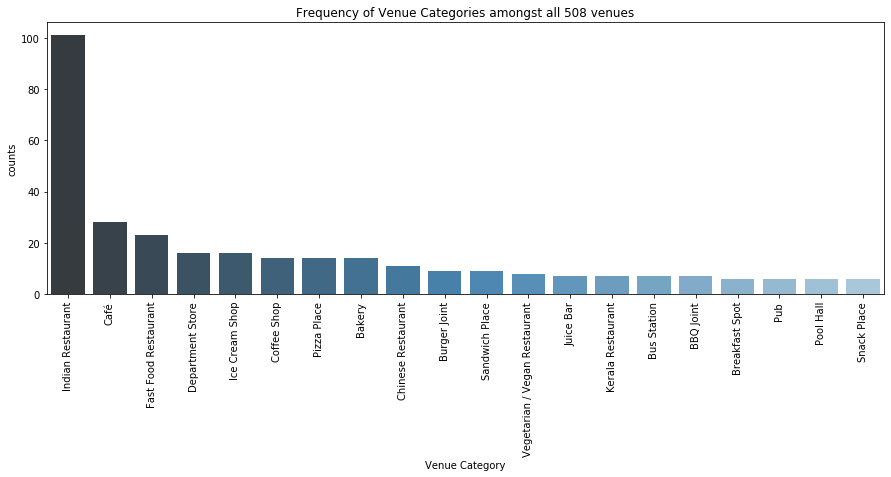

In [197]:
plt.subplots(figsize=(15,5))
seaborn.barplot(x='Venue Category',y='counts',data=df_venues[:20],palette="Blues_d")
plt.xticks(rotation='vertical')
plt.title('Frequency of Venue Categories amongst all 508 venues')

In [112]:
# one hot encoding
bengaluru_onehot = pandas.get_dummies(bengaluru_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bengaluru_onehot['Neighborhood'] = bengaluru_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [bengaluru_onehot.columns[-1]] + list(bengaluru_onehot.columns[:-1])
bengaluru_onehot = bengaluru_onehot[fixed_columns]

bengaluru_onehot.head()

,Yoga Studio,ATM,Accessories Store,Andhra Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Badminton Court,Bakery,...,Sporting Goods Shop,Steakhouse,Swiss Restaurant,Tea Room,Toll Booth,Tourist Information Center,Trail,Train Station,Vegetarian / Vegan Restaurant,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
bengaluru_grouped = bengaluru_onehot.groupby('Neighborhood').mean().reset_index()

In [114]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [116]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in numpy.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pandas.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bengaluru_grouped['Neighborhood']

for ind in numpy.arange(bengaluru_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bengaluru_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Anjanapura,Pool,Women's Store,Cricket Ground,Department Store,Dessert Shop,Diner,Discount Store,Donut Shop,Eastern European Restaurant,Electronics Store
1,Arekere,Indian Restaurant,Department Store,Pizza Place,Chinese Restaurant,Ice Cream Shop,Sporting Goods Shop,Fast Food Restaurant,Sandwich Place,Mediterranean Restaurant,Café
2,BTM Layout,Indian Restaurant,Pizza Place,Park,Restaurant,Italian Restaurant,Fast Food Restaurant,Sandwich Place,Vegetarian / Vegan Restaurant,Diner,Discount Store
3,Banashankari,Park,Vegetarian / Vegan Restaurant,Indian Restaurant,Fast Food Restaurant,Flea Market,Department Store,Dessert Shop,Diner,Discount Store,Donut Shop
4,Banaswadi,Bakery,Kerala Restaurant,Indian Restaurant,BBQ Joint,Vegetarian / Vegan Restaurant,Discount Store,Diner,Donut Shop,Eastern European Restaurant,Food


In [156]:
neighborhoods_venues_sorted.head(15)

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2,Anjanapura,Pool,Women's Store,Cricket Ground,Department Store,Dessert Shop,Diner,Discount Store,Donut Shop,Eastern European Restaurant,Electronics Store
1,2,Arekere,Indian Restaurant,Department Store,Pizza Place,Chinese Restaurant,Ice Cream Shop,Sporting Goods Shop,Fast Food Restaurant,Sandwich Place,Mediterranean Restaurant,Café
2,0,BTM Layout,Indian Restaurant,Pizza Place,Park,Restaurant,Italian Restaurant,Fast Food Restaurant,Sandwich Place,Vegetarian / Vegan Restaurant,Diner,Discount Store
3,0,Banashankari,Park,Vegetarian / Vegan Restaurant,Indian Restaurant,Fast Food Restaurant,Flea Market,Department Store,Dessert Shop,Diner,Discount Store,Donut Shop
4,2,Banaswadi,Bakery,Kerala Restaurant,Indian Restaurant,BBQ Joint,Vegetarian / Vegan Restaurant,Discount Store,Diner,Donut Shop,Eastern European Restaurant,Food
5,1,Basavanagudi,Indian Restaurant,Fast Food Restaurant,Sandwich Place,Breakfast Spot,Asian Restaurant,Plaza,Road,Event Space,Fish Market,Farmers Market
6,2,Basaveshwaranagar,Indian Restaurant,Fast Food Restaurant,Gym / Fitness Center,Market,Karnataka Restaurant,Snack Place,Gastropub,Burger Joint,Asian Restaurant,Ice Cream Shop
7,1,Begur,Indian Restaurant,Women's Store,Food,Dessert Shop,Diner,Discount Store,Donut Shop,Eastern European Restaurant,Electronics Store,Event Space
8,2,Bellandur,Indian Restaurant,Kerala Restaurant,Fast Food Restaurant,Café,Japanese Restaurant,Pizza Place,Coffee Shop,Chinese Restaurant,Dessert Shop,Food Court
9,2,Bommanahalli,Hotel Pool,Cafeteria,Indian Restaurant,Furniture / Home Store,Discount Store,Pizza Place,Hotel Bar,Athletics & Sports,Diner,Donut Shop


## K Means Clustering

In [117]:
kclusters = 5

bengaluru_grouped_clustering = bengaluru_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bengaluru_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 2, 0, 0, 2, 1, 2, 1, 2, 2])

In [118]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [119]:
bengaluru_merged = df_final

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
bengaluru_merged = bengaluru_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

bengaluru_merged.head()

,Neighborhood,Image,Summary,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Cantonment area,NaN,The Cantonment area in Bangalore was used as a...,12.9938,77.5978,2.0,Indian Restaurant,Pool Hall,Music Venue,Event Space,Pub,Concert Hall,Gym / Fitness Center,Tea Room,Steakhouse,Badminton Court
1,Domlur,NaN,"Formerly part of the Cantonment area, Domlur h...",12.9608,77.6361,2.0,Pizza Place,Indian Restaurant,Café,Bakery,Flea Market,Dessert Shop,Diner,Discount Store,Donut Shop,Eastern European Restaurant
2,Indiranagar,NaN,Indiranagar is a sought-after residential and ...,12.9699,77.6499,1.0,Indian Restaurant,Pub,Burger Joint,Chinese Restaurant,Speakeasy,Café,Flea Market,Multicuisine Indian Restaurant,Korean Restaurant,Juice Bar
3,Jeevanbheemanagar,NaN,NaN,12.966,77.6577,1.0,Indian Restaurant,Dessert Shop,Café,Bakery,Food,Diner,Discount Store,Donut Shop,Eastern European Restaurant,Electronics Store
4,Malleswaram,NaN,NaN,13.0031,77.5643,2.0,Ice Cream Shop,Breakfast Spot,Indian Restaurant,Bakery,Food,Diner,Discount Store,Donut Shop,Eastern European Restaurant,Electronics Store


In [152]:
#bengaluru_merged = bengaluru_merged.drop(bengaluru_merged[bengaluru_merged['Cluster Labels'].isna()].index)
#bengaluru_merged.reset_index()
bengaluru_merged['Cluster Labels'] = bengaluru_merged['Cluster Labels'].astype('int32')

In [151]:
bengaluru_merged.head(10)

,Neighborhood,Image,Summary,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Cantonment area,NaN,The Cantonment area in Bangalore was used as a...,12.9938,77.5978,2.0,Indian Restaurant,Pool Hall,Music Venue,Event Space,Pub,Concert Hall,Gym / Fitness Center,Tea Room,Steakhouse,Badminton Court
1,Domlur,NaN,"Formerly part of the Cantonment area, Domlur h...",12.9608,77.6361,2.0,Pizza Place,Indian Restaurant,Café,Bakery,Flea Market,Dessert Shop,Diner,Discount Store,Donut Shop,Eastern European Restaurant
2,Indiranagar,NaN,Indiranagar is a sought-after residential and ...,12.9699,77.6499,1.0,Indian Restaurant,Pub,Burger Joint,Chinese Restaurant,Speakeasy,Café,Flea Market,Multicuisine Indian Restaurant,Korean Restaurant,Juice Bar
3,Jeevanbheemanagar,NaN,NaN,12.966,77.6577,1.0,Indian Restaurant,Dessert Shop,Café,Bakery,Food,Diner,Discount Store,Donut Shop,Eastern European Restaurant,Electronics Store
4,Malleswaram,NaN,NaN,13.0031,77.5643,2.0,Ice Cream Shop,Breakfast Spot,Indian Restaurant,Bakery,Food,Diner,Discount Store,Donut Shop,Eastern European Restaurant,Electronics Store
5,Pete area,NaN,Established by Kempe Gowda I at the time of cr...,12.9627,77.5758,3.0,Historic Site,Bus Station,Food,Market,Women's Store,Fish Market,Dessert Shop,Diner,Discount Store,Donut Shop
6,Sadashivanagar,NaN,Sadashivanagar is an upscale neighbourhood in ...,13.0093,77.5806,2.0,Coffee Shop,Indian Restaurant,Café,Women's Store,Electronics Store,Pizza Place,Plaza,Seafood Restaurant,Department Store,Gym
7,Seshadripuram,NaN,Seshadripuram was established in 1892 to reduc...,12.983,77.567,2.0,Platform,Women's Store,Cricket Ground,Department Store,Dessert Shop,Diner,Discount Store,Donut Shop,Eastern European Restaurant,Electronics Store
8,Shivajinagar,NaN,Shivajinagar is one of the older areas of the ...,12.99,77.6,2.0,Pool Hall,Gym / Fitness Center,Badminton Court,Concert Hall,Middle Eastern Restaurant,Bakery,Optical Shop,Tea Room,Garden Center,Event Space
9,Ulsoor,NaN,Ulsoor (or Halasuru) is one of the oldest area...,12.97,77.63,2.0,Juice Bar,Café,Sporting Goods Shop,South Indian Restaurant,Pizza Place,Arts & Crafts Store,Indian Restaurant,Bar,Farmers Market,Falafel Restaurant


In [155]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = numpy.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(numpy.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bengaluru_merged['Latitude'],bengaluru_merged['Longitude'],bengaluru_merged['Neighborhood'],bengaluru_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### As can be seen, the cities of Bengaluru and New York (lab) are quite different. The most common venues in Bengaluru includes - Indian Restaurant, Cafe Shops, Department Stores, Pizza place, Desert shop, Fast food restaurants, and Bakery.
### Whereas, in New York, the most visited places are - Coffee shop, Cocktail bar, Park, Italian restaurant, Yoga studio, Gym and French Restaurant.
### Hence, in case of restaurants, it makes sense to open either 'Indian Restaurant' or 'Pizza Place' or 'Desert Shop' in Bengaluru, India.

### Lets assume that the restaurant to be opened is a 'Pizza Place'. Hence, further location analysis is required to decide the neighbourhood.

In [166]:
bengaluru_merged[(bengaluru_merged['1st Most Common Venue']=='Pizza Place') | 
                 (bengaluru_merged['2nd Most Common Venue']=='Pizza Place') |
                 (bengaluru_merged['3rd Most Common Venue']=='Pizza Place')]

,Neighborhood,Image,Summary,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Domlur,NaN,"Formerly part of the Cantonment area, Domlur h...",12.9608,77.6361,2,Pizza Place,Indian Restaurant,Café,Bakery,Flea Market,Dessert Shop,Diner,Discount Store,Donut Shop,Eastern European Restaurant
12,CV Raman Nagar,NaN,CV Raman Nagar is a neighbourhood to the west ...,12.9856,77.6639,0,Pizza Place,Shop & Service,Department Store,Indian Restaurant,Park,Fast Food Restaurant,Cupcake Shop,Dessert Shop,Diner,Discount Store
31,Vidyaranyapura,NaN,NaN,13.076,77.558,2,Dessert Shop,Pizza Place,Department Store,Basketball Court,Chinese Restaurant,Coffee Shop,Indian Restaurant,Gym,Ice Cream Shop,Discount Store
36,BTM Layout,NaN,BTM Layout is a commercial and residential nei...,12.92,77.61,0,Indian Restaurant,Pizza Place,Park,Restaurant,Italian Restaurant,Fast Food Restaurant,Sandwich Place,Vegetarian / Vegan Restaurant,Diner,Discount Store
50,Arekere,NaN,NaN,12.89,77.6,2,Indian Restaurant,Department Store,Pizza Place,Chinese Restaurant,Ice Cream Shop,Sporting Goods Shop,Fast Food Restaurant,Sandwich Place,Mediterranean Restaurant,Café


### Amongst neighbourhoods - Domlur, CV Raman Nagar, Vidyaranyapura, BTM Layout, Arekere - are the locations wherein 'Pizza Place' is amongst the top 3 most common venue. Out of these 5 places, only CV Raman Nagar and BTM Layout are located nearby metro stations. 

### BTM Layout seems a better choice compared to CV Raman Nagar because of two other factors. First, BTM layout is more popular commercial and residential area of Bangalore. Second, as can be inferred from the most common venues list, more restaurants are visited in BTM layout (in the top 10 venues) compared to CV Raman Nagar. Hence, the final choice of neighbourhood should be 'BTM Layout' for opening a Pizza restaurant. 